In [31]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [32]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()


In [33]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [34]:
len(df['Pclass'].unique())

3

In [35]:
# data analysis
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

print(df.head())

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0       3    male  22.0      1      0   7.2500        S         0
1       1  female  38.0      1      0  71.2833        C         1
2       3  female  26.0      0      0   7.9250        S         1
3       1  female  35.0      1      0  53.1000        S         1
4       3    male  35.0      0      0   8.0500        S         0


['Sex', 'Embarked'] ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']


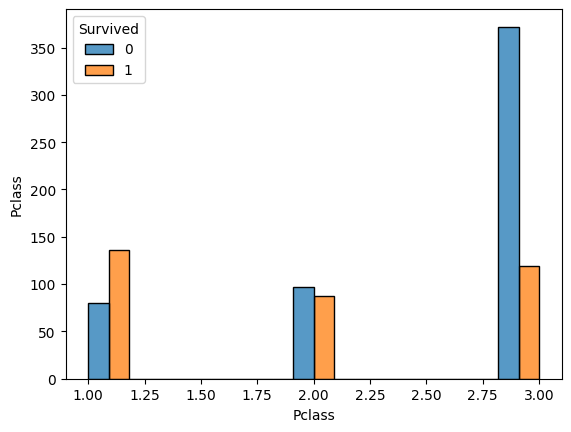

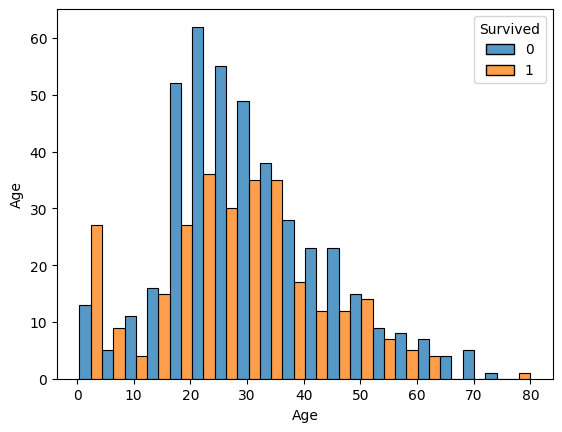

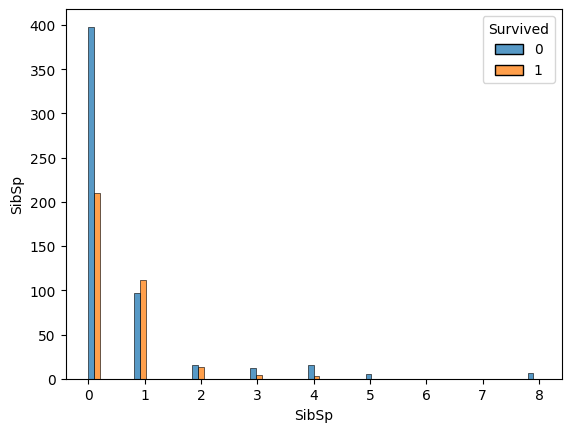

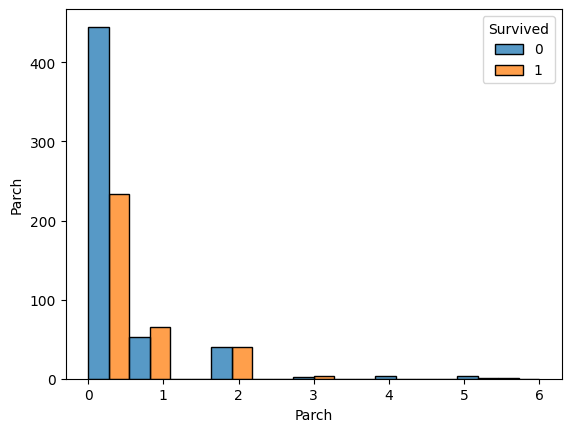

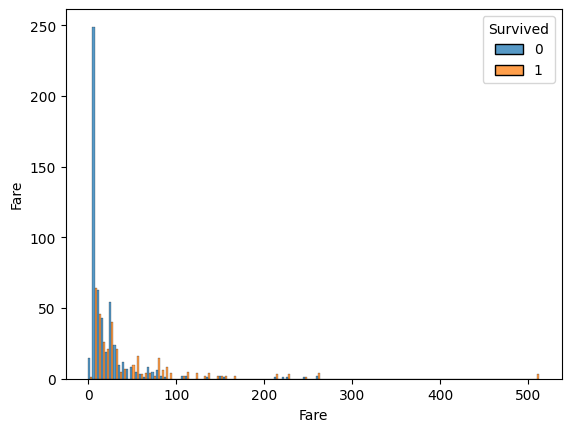

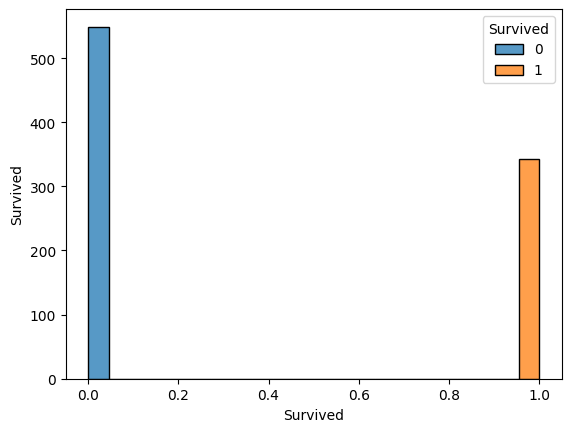

In [36]:

numerical, categorical = [], []

for feature in df.columns:

    if df[feature].dtype == 'O':
        categorical.append(feature)
    else:
        numerical.append(feature)
        
print(categorical, numerical)
import seaborn as sns
for i in numerical:
    sns.histplot(data=df, x=i, hue='Survived', multiple='dodge')
    plt.ylabel(i)
    plt.show()



In [37]:

res = df[numerical].groupby('Survived').mean()
res

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [38]:
df = df[['Sex', 'Age', 'Survived']]

df.groupby('Sex')['Survived'].mean()

d = pd.get_dummies(df['Sex'])
df = pd.concat([df, d], axis=1).drop(columns=['Sex'])
df.Age = df.Age.fillna(df['Age'].mean())

In [39]:
x = df.drop(columns='Survived')

In [40]:
y = df['Survived']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7988826815642458